# Police Stops in Massachusetts
Visualizing racial disparities in police stops by Massachusetts State Police

In [48]:
# Load Data
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from operator import add

In [3]:
df = pd.read_csv("ma_statewide_2020_04_01.csv")
print(df.shape)
df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3416238, 24)


,raw_row_number,date,location,county_name,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,contraband_weapons,contraband_alcohol,contraband_other,frisk_performed,search_conducted,search_basis,reason_for_stop,vehicle_type,vehicle_registration_state,raw_Race
0,1,2007-06-06,MIDDLEBOROUGH,Plymouth County,33.0,white,male,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,Speed,Passenger,MA,White
1,2,2007-06-07,SEEKONK,Bristol County,36.0,white,male,vehicular,False,False,...,False,False,False,False,True,other,NaN,Commercial,MA,White
2,3,2007-06-07,MEDFORD,Middlesex County,56.0,white,female,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Passenger,MA,White
3,4,2007-06-07,MEDFORD,Middlesex County,37.0,white,male,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,White
4,5,2007-06-07,EVERETT,Middlesex County,22.0,hispanic,female,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,Hispanic


In [4]:
# Filter rows that don't have race data 
df = df[df["subject_race"].notnull()]
print(df.shape)
df.head()

(3414574, 24)


,raw_row_number,date,location,county_name,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,contraband_weapons,contraband_alcohol,contraband_other,frisk_performed,search_conducted,search_basis,reason_for_stop,vehicle_type,vehicle_registration_state,raw_Race
0,1,2007-06-06,MIDDLEBOROUGH,Plymouth County,33.0,white,male,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,Speed,Passenger,MA,White
1,2,2007-06-07,SEEKONK,Bristol County,36.0,white,male,vehicular,False,False,...,False,False,False,False,True,other,NaN,Commercial,MA,White
2,3,2007-06-07,MEDFORD,Middlesex County,56.0,white,female,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Passenger,MA,White
3,4,2007-06-07,MEDFORD,Middlesex County,37.0,white,male,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,White
4,5,2007-06-07,EVERETT,Middlesex County,22.0,hispanic,female,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,Hispanic


We only removed 1,664 records. 

In [5]:
# Racial breakdown of traffic stops
racial_breakdown = df.groupby('subject_race')['raw_row_number'].nunique()

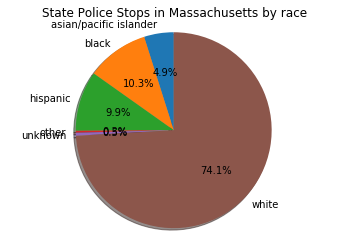

In [6]:
labels = []
sizes = []

for race, stops in racial_breakdown.items():
    labels.append(race)
    sizes.append(stops)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("State Police Stops in Massachusetts by race")
plt.show()

Massachusetts in 2018 was about 12.3% Hispanic, 80% White (71.4% non-Hispanic White), 8.9% Black, 7.2% AAPI, and 3% other. (These don't add up to 100% because Hispanic is not considered a race by the Census). Overall, police stops in Massachusetts are roughly inline with proportions of Census categories, though there could be discrepancies due to how police perceive the people they stop.

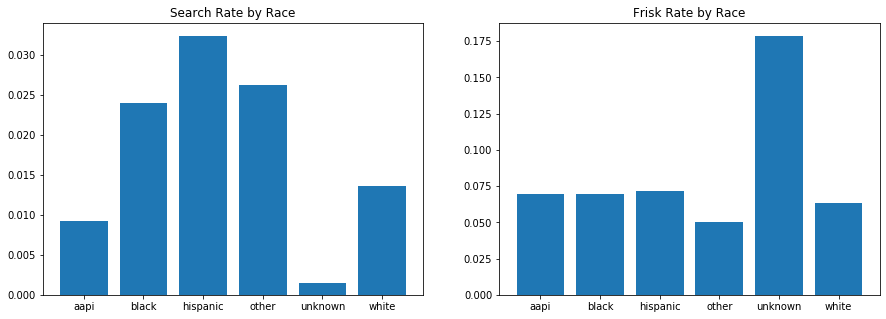

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))

# Search rate, by race
search_by_race = df.groupby(['subject_race', 'search_conducted'])['raw_row_number'].nunique()

labels = ["aapi", "black", "hispanic", "other", "unknown", "white"]
search_rate = []

for i in range(0, 2 * len(labels), 2):
    search_rate.append(search_by_race[i + 1] / (search_by_race[i] + search_by_race[i + 1]))

ax1.bar(labels, search_rate)
ax1.set_title('Search Rate by Race')

# Frisk rate, by race
frisk_by_race = df.groupby(['subject_race', 'frisk_performed'])['raw_row_number'].nunique()
frisk_rate = []

for i in range(0, 2 * len(labels), 2):
    frisk_rate.append(frisk_by_race[i + 1] / (frisk_by_race[i] + frisk_by_race[i + 1]))

ax2.bar(labels, frisk_rate)
ax2.set_title('Frisk Rate by Race')

plt.show()

As can be seen, Black and Hispanic people are disproportionately searched by race, and POC generally are frisked at slightly higher rates than white people, though this is not a significant enough difference, and there aren't as many data points for frisking. (Ignore other & unknown, data is not enough)

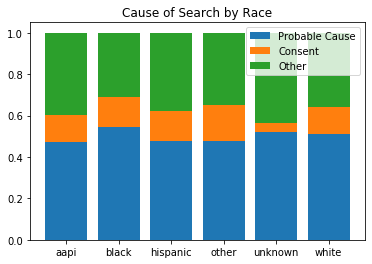

In [54]:
# Search basis, by race
search_basis_by_race = df.groupby(['subject_race', 'search_basis'])['raw_row_number'].nunique()
probable_cause_by_race = []
consent_cause_by_race = []
other_cause_by_race = []

for i in range(0, 3 * len(labels), 3):
    total = (search_basis_by_race[i] + search_basis_by_race[i + 1] + search_basis_by_race[i + 2])
    consent_cause_by_race.append(search_basis_by_race[i] / total)
    other_cause_by_race.append(search_basis_by_race[i + 1] / total)
    probable_cause_by_race.append(search_basis_by_race[i + 2] / total)
    
ind = np.arange(len(labels))   
p1 = plt.bar(ind, probable_cause_by_race)
p2 = plt.bar(ind, consent_cause_by_race, bottom=probable_cause_by_race)
p3 = plt.bar(ind, other_cause_by_race, bottom=list(map(add, probable_cause_by_race, consent_cause_by_race)))

plt.xticks(ind, labels)
plt.title('Cause of Search by Race')
plt.legend((p1[0], p2[0], p3[0]), ('Probable Cause', 'Consent', 'Other'))

plt.show()

There doesn't seem to be that much variation in why police search, with the exception that "probable cause" is a more common reason when searching African Americans.  

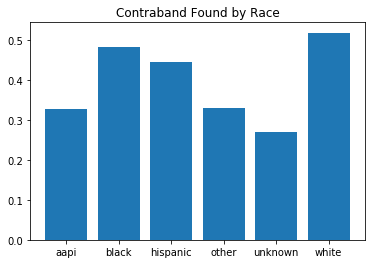

In [82]:
# Outcome test 
contraband_found_by_race = df.groupby(['subject_race', 'contraband_found'])['raw_row_number'].nunique()
contraband_rate = []

for i in range(0, 2 * len(labels), 2):
    contraband_rate.append(contraband_found_by_race[i + 1] / (contraband_found_by_race[i] + contraband_found_by_race[i + 1]))
    
plt.bar(labels, contraband_rate)
plt.title('Contraband Found by Race')
plt.show()

As can be seen, contraband is actually found in lower rates amongst Black and Hispanic people who are searched, despite the fact that Black and Hispanic people are more likely to be searched when stopped. This suggests some discriminatory policing 

In [1]:
# contraband_(found, drugs, weapons, alcohol, other), arrest_made, citation_issued, warning_issued, 

# Map by county and location, stop rates vs population rates

# subject_age, subject_sex 